## Import Library

In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("./input"))

/Users/goodtool/.pyenv/versions/3.8.1/envs/jupyter/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


['sampleSubmission.csv', 'test1', 'test1.zip', 'train', 'train.zip']


## Define Constants

In [38]:
FAST_RUN = True
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

## Prepare Training Data

In [4]:
filenames = os.listdir("./input/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename':filenames,
    'category': categories
})

In [5]:
df.head()

,filename,category
0,dog.8011.jpg,1
1,cat.5077.jpg,0
2,dog.7322.jpg,1
3,cat.2718.jpg,0
4,cat.10151.jpg,0


In [6]:
df.tail()

,filename,category
24995,dog.8008.jpg,1
24996,dog.1992.jpg,1
24997,dog.12412.jpg,1
24998,cat.2701.jpg,0
24999,cat.10148.jpg,0


See Total In count

<AxesSubplot:>

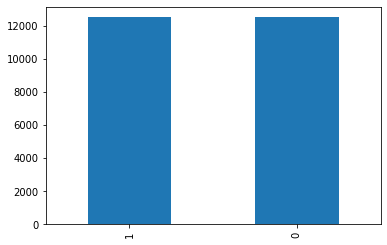

In [14]:
df['category'].value_counts().plot.bar()

## See sample image

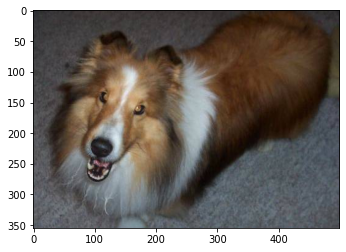

In [7]:
sample = random.choice(filenames)
image = load_img("./input/train/" + sample)
plt.imshow(image)

In [8]:
# Build Model

- Input Layer: It represent input image data. It will reshape image into single dimension array. Example your image is 64*64 = 4096, it will convert to (4096,1) array.
- Conv Layer: This layer will extract features from image
- Pooling Layer: This layer reduce the spatial volume of input image after convolution
- Fully Connected Layer: It connect the network from a layer to another layer
- Output Layer: It is the predicted values layer.

SyntaxError: invalid syntax (2915264841.py, line 3)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

2021-08-07 17:54:16.680531: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

## Callbacks

In [10]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

### Early Stop
To prevent over fitting we will stop the learning after 10 apochs and val_loss value not decreased

In [11]:
earlystop = EarlyStopping(patience=10)

In [ ]:
### Learning Rate Reduction
We will reduce the learning rate when then accuracy not increase for 2 steps

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

In [13]:
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
## Prepare data

In [ ]:
Because we will use image generator with class_mode="categorical". We need to convert column category into string. Then imagegenerator will convert it on-hot encoding which is goot for our classfication.
So we will convert 1 to dog and 0 to cat

In [14]:
df["category"] = df["category"].replace({0:'cat', 1:'dog'}) # 왜 다시 cat, dog으로? 처을부터 그렇게 하지..

In [15]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state = 42) # 그런데 미리 나누어 놓는게 아니고 왜 이 때 나누지? 실행할 때마다 달라지는 것 아닌가?
# random으로 나뉘어서 기존 인덱스가 의미없으므로 다시 인덱스를 지정해주기
train_df = train_df.reset_index(drop=True) 
validate_df = validate_df.reset_index(drop=True)
print(train_df)
print(validate_df)

            filename category
0      cat.11282.jpg      cat
1       cat.7693.jpg      cat
2       cat.4977.jpg      cat
3       dog.9403.jpg      dog
4      cat.10150.jpg      cat
...              ...      ...
19995   dog.2721.jpg      dog
19996   dog.3974.jpg      dog
19997  dog.10427.jpg      dog
19998    cat.731.jpg      cat
19999   dog.6540.jpg      dog

[20000 rows x 2 columns]
           filename category
0      cat.1474.jpg      cat
1     dog.11287.jpg      dog
2      dog.8276.jpg      dog
3      cat.7227.jpg      cat
4      cat.2997.jpg      cat
...             ...      ...
4995   cat.7991.jpg      cat
4996   dog.9208.jpg      dog
4997   cat.5676.jpg      cat
4998   cat.9901.jpg      cat
4999   dog.9535.jpg      dog

[5000 rows x 2 columns]


<AxesSubplot:>

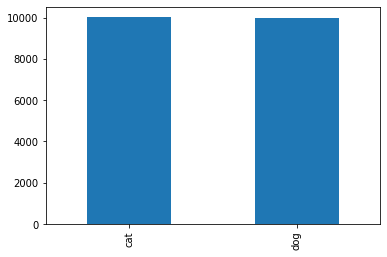

In [16]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

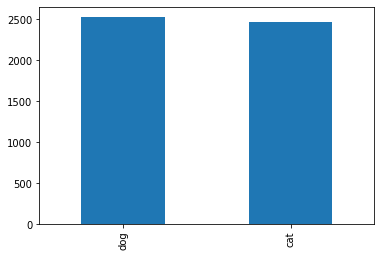

In [17]:
validate_df['category'].value_counts().plot.bar()

In [18]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

print(f'total_train: {total_train} / total_validate: {total_validate}')

total_train: 20000 / total_validate: 5000


## Training Generator

In [19]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1/255, # 왜 1.?
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "./input/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    bach_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


## Validation Generator

In [20]:
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "./input/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


## See hou our generator work

In [21]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "./input/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
)

Found 1 validated image filenames belonging to 1 classes.


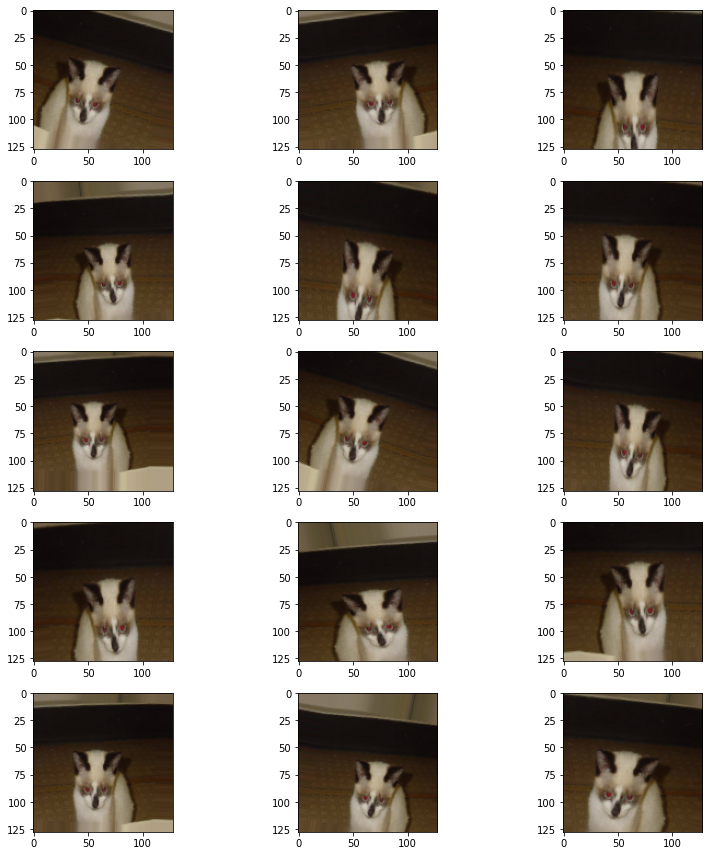

In [33]:
plt.figure(figsize=(12,12))
for i in range(0, 15):
    plt.subplot(5,3,i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Fit Model

In [42]:
epochs=3 if FAST_RUN else 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size, # batch size를 주는 것으로는 해결이 안되나? iteration을 몇번할 것인지 하는 것 같은데..
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
) 

Epoch 1/50
1333/1333 [==============================] - 458s 343ms/step - loss: 0.5269 - accuracy: 0.7375 - val_loss: 1.2811 - val_accuracy: 0.6220


## Save Model

In [43]:
model.save_weights("model.h5")

SyntaxError: EOL while scanning string literal (115887697.py, line 1)

In [ ]:
fig, (ax1, ax2) plt.subplots(2, 1, figzise(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r', label="Validation accuracy")
ax2.set_xticks(np.range(1, epochs, 1))

legend = plt.legent(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## Prepare Testing Data

In [ ]:
test_filenames = os.listdir("./input/test1")
test_df = pd.DataFrame({
    'filename':test_filenames
})
nb_samples = test_df.shape[0]

## Creating Testing Generator

In [ ]:
test_gen = ImageDataGenerator(rescale=1/255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    './input/test1',
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

## Predict

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

For categoral classication the prediction will come with probability of each category. So we will pick the category that have highest probability with numpy average max

In [ ]:
test_df['category'] = np.argmax(predix, axis=-1)

We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data ingo computer vision.

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

From our prepare data part. We map data with {1: 'dog', 0: 'cat'}. Now we will map the result back to dog is 1 and cat is 0

In [ ]:
test_df['category'] = test_df['category'].replace({'dog':1, 'cat':0})

## Visualize Result

In [ ]:
test_df['category'].value_counts().plot_bar()

### See predicted result with images

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=12,24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./input/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6,3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '('  "{}".format(category) + ')')
plt.tight_layout()
plt.show()

## Submission

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis =1, inplace=True)
submission_df.to_csv('submission.csv', index=False)